In [2]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/test/dataset.csv')
df.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,sum_N,incoming_packets_size,outgoing_packets_size,total_packets_size,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,2842,-665600,61952,-603648,0
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,1036,-224256,40960,-183296,0
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,2716,-634880,60416,-574464,0
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,2892,-677888,62464,-615424,0
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,2812,-660992,58880,-602112,0


In [3]:
print(df.shape)

(19000, 17)


In [4]:
X = df.drop('y', axis=1)
y = df['y']

print(X.shape)
print(y.shape)
X.head()

(19000, 16)
(19000,)


,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,sum_N,incoming_packets_size,outgoing_packets_size,total_packets_size
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,2842,-665600,61952,-603648
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,1036,-224256,40960,-183296
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,2716,-634880,60416,-574464
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,2892,-677888,62464,-615424
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,2812,-660992,58880,-602112


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 선형 커널 사용 (SVC)

### 튜닝 전 정확도

In [8]:
svm_linear = SVC(kernel='linear') # C = 1.0
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print('accuracy_score (linear kernel) : ', accuracy_score(y_test, y_pred_linear))

accuracy_score (linear kernel) :  0.3975438596491228


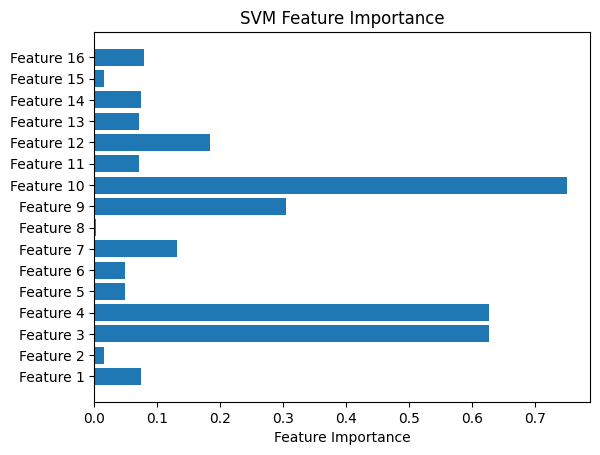

In [9]:
import matplotlib.pyplot as plt

feature_importance = np.abs(svm_linear.coef_[0])
feature_names = [f"Feature {i+1}" for i in range(len(feature_importance))]

plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.title('SVM Feature Importance')
plt.show()

In [10]:
svm_rbf = SVC(kernel='rbf') # C = 1.0, gamma = scale
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print('accuracy_score (rbf kernel) : ', accuracy_score(y_test, y_pred_rbf))

accuracy_score (rbf kernel) :  0.4005263157894737


In [11]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print('accuracy_score (poly kernel) : ', accuracy_score(y_test, y_pred_poly))

accuracy_score (poly kernel) :  0.31894736842105265


### 그리드 서치

In [12]:
svm = SVC()

# params = {'C': [0.5, 0.6, 0.7, 0.8, 0.9],
#               'kernel': ['linear', 'rbf']}

params = {
    'C': [100, 500, 1000],  # Different values of C
    'kernel': ['rbf'],  # Different types of kernels
    'gamma': [0.5, 1, 'scale'],  # Different values of gamma (for 'rbf' and 'poly' kernels)
}

grid = GridSearchCV(svm, params, refit=True, verbose=3)

In [13]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=100, gamma=0.5, kernel=rbf;, score=0.720 total time=   7.9s
[CV 2/5] END ......C=100, gamma=0.5, kernel=rbf;, score=0.715 total time=  10.1s
[CV 3/5] END ......C=100, gamma=0.5, kernel=rbf;, score=0.709 total time=  10.4s
[CV 4/5] END ......C=100, gamma=0.5, kernel=rbf;, score=0.720 total time=   8.5s
[CV 5/5] END ......C=100, gamma=0.5, kernel=rbf;, score=0.712 total time=   9.7s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.713 total time=   8.7s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.713 total time=  11.3s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   9.6s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.717 total time=  10.2s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.711 total time=  10.7s
[CV 1/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.654 total time=   7.7s
[CV 2/5] END ....C=100, gamma=scale, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100, 500, 1000], 'gamma': [0.5, 1, 'scale'],
                         'kernel': ['rbf']},
             verbose=3)

In [14]:
print("최적 파라미터: ", grid.best_params_)
print("최적 모델: ", grid.best_estimator_)

최적 파라미터:  {'C': 500, 'gamma': 0.5, 'kernel': 'rbf'}
최적 모델:  SVC(C=500, gamma=0.5)


In [15]:
y_pred = grid.best_estimator_.predict(X_test)
print('최적 모델의 교차 검증 정확도: {}'.format(grid.best_score_)) #최적의 하이퍼파라미터 조합에 대한 모델의 예측 정확도 -> 데이터에 대한 모델의 일반화 정도
print("테스트 정확도: {}".format(accuracy_score(y_test, y_pred))) #테스트 데이터셋에 대한 모델의 정확도 -> 이게 낮으면 과적합 위험

최적 모델의 교차 검증 정확도: 0.718796992481203
테스트 정확도: 0.7249122807017544


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt

def print_graph(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred) # 정확도
    precision = precision_score(y_test , pred, average='macro') # 정밀도
    recall = recall_score(y_test , pred, average='macro') # 재현도
    f1 = f1_score(y_test,pred, average='macro')
    estimation=['accuracy','precision','recall']
    value=[accuracy, precision, recall]
    plt.bar(estimation, value)
    plt.title('Random Forest')
    plt.show()
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}'.format(accuracy, precision, recall, f1))

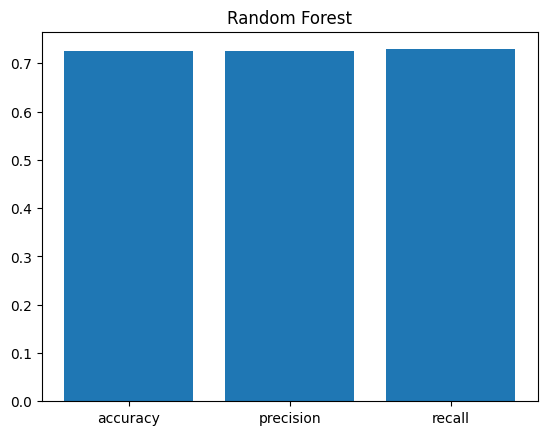

정확도: 0.7249, 정밀도: 0.7250, 재현율: 0.7290,    F1: 0.7249


In [19]:
print_graph(y_test, y_pred)